In [41]:
import os
import glob
import pickle

import numpy as np
from scipy import signal
from scipy.interpolate import InterpolatedUnivariateSpline
from astropy import units as u
from astropy.time import Time

import matplotlib.pyplot as plt

In [16]:
pulsar = '1237+25'

In [17]:
files = sorted(glob.glob('.{0}data_part{0}{1}{0}*{1}.log'.format(os.sep, pulsar)))
print(files)

['.\\data_part\\1237+25\\030518_00_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\040518_00_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\050518_00_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\070518_00_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\080518_00_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\100518_23_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\110518_23_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\120518_23_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\130518_23_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\140518_23_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\150518_23_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\160518_23_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\170518_23_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\180518_23_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\190518_23_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\200518_23_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\210518_23_N1_00_part_1237+25.lo

In [18]:
full_data = []
for file in files:
    with open(file, 'rb') as f:
        data = pickle.load(f)
    full_data.append(data)

In [20]:
full_data[2][3]

array([ 0.        ,  0.01065281,  0.        , ...,  0.00203371,
       -0.01175191, -0.04441032])

In [78]:
fs = 10 # частотота дискретизации временных рядов 
f, Pxx_den = signal.periodogram(full_data[2][3], fs)
points = np.argwhere(np.diff(np.sign(Pxx_den - 0.3*np.max(Pxx_den)))).flatten()
points = [i for i in points if f[i] > 0.005] # Cut zero harmonic
for i in points:
    print(f[i])

0.72021484375
0.72265625
1.44287109375
1.44775390625
2.16552734375
2.17041015625
2.88818359375
2.89306640625


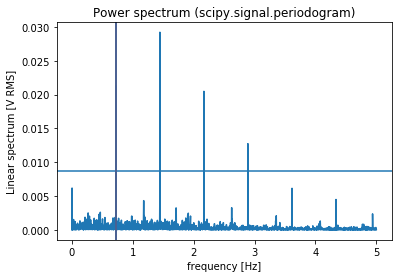

In [84]:
plt.figure()
plt.plot(f, Pxx_den)
#plt.plot(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.title('Power spectrum (scipy.signal.periodogram)')
plt.axhline(0.3*np.max(Pxx_den))
#plt.xlim(0.71, 0.73)
plt.axvline(0.72021484375)
plt.axvline((0.72021484375 + 0.72265625)/2, color='r')
plt.axvline(0.72265625)
plt.show()

In [82]:
# Отрисовка сплайна спектра
inter_point = 1000000
    
point_for_pulse = range(len(Pxx_den))
    
spl = InterpolatedUnivariateSpline(point_for_pulse, Pxx_den)
xs = np.linspace(0, max(f), 2049) 
spline = spl(xs)

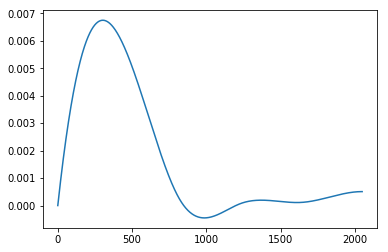

In [83]:
plt.figure()
plt.plot(spline)
#plt.xlim(inter_point/0.71, inter_point/0.73)
plt.show()

In [61]:
max(f)

5.0

array([0.00000000e+00, 2.44140625e-03, 4.88281250e-03, ...,
       4.99511719e+00, 4.99755859e+00, 5.00000000e+00])